# **20BCE1205**

# **Shubham Ojha**

ML Lab6-
Download a dataset from UCI/Kaggle or any repository and perform the following:
1. Apply a minimum of 4 supervised learning algorithms and fit the model for the training dataset
2. Predict the classes for the test dataset for the same 4 algorithms considered, display the results and plot the same
3. Compare the results of the test data  with respect to the evaluation metrics.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

In [ ]:
data_frame = pd.read_csv("/content/lab6.csv")
data_frame.shape

False


In [ ]:
print (data_frame.isnull().values.any())

In [ ]:
data_frame.head(5)

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [ ]:
def plot_corr(data_frame, size=11):
    corr = data_frame.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

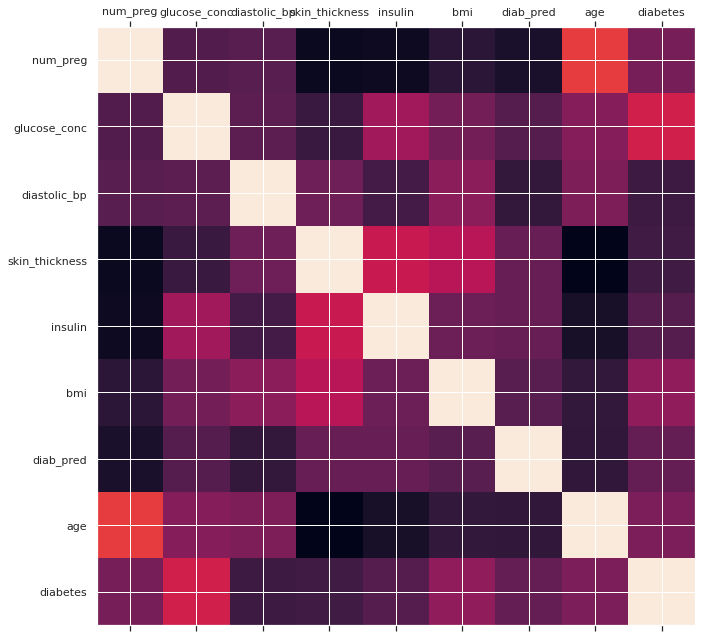

In [ ]:
plot_corr(data_frame)

In [ ]:
data_frame.corr()

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
data_frame.head(5)

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [ ]:
diabetes_map = {True : 1, False : 0}
data_frame['diabetes'] = data_frame['diabetes'].map(diabetes_map)

In [ ]:
data_frame.isnull().values.any()

False

In [ ]:
num_obs = len(data_frame)
num_true = len(data_frame.loc[data_frame['diabetes'] == 1])
num_false = len(data_frame.loc[data_frame['diabetes'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (( 1.0 * num_false)/(1.0 * num_obs)) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


In [ ]:
from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'skin_thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = data_frame[feature_col_names].values
y = data_frame[predicted_class_names].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 

In [ ]:
trainval = (1.0 * len(X_train)) / (1.0 * len(data_frame.index))
testval = (1.0 * len(X_test)) / (1.0 * len(data_frame.index))

In [ ]:
print("# rows in dataframe {0}".format(len(data_frame)))
print("# rows missing glucose_conc: {0}".format(len(data_frame.loc[data_frame['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(data_frame.loc[data_frame['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(data_frame.loc[data_frame['skin_thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(data_frame.loc[data_frame['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(data_frame.loc[data_frame['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(data_frame.loc[data_frame['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(data_frame.loc[data_frame['age'] == 0])))


# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


# **1. Naive Bayes**

In [ ]:
from sklearn.impute import SimpleImputer
fill_0 = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB()

In [ ]:
prediction_from_trained_data = nb_model.predict(X_train)

In [ ]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our naive bayes model is : {0:.4f}".format(accuracy))

Accuracy of our naive bayes model is : 0.7672


In [ ]:
prediction_from_test_data = nb_model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, prediction_from_test_data)

print ("Accuracy of our naive bayes model is: {0:0.4f}".format(accuracy))

Accuracy of our naive bayes model is: 0.7446


In [ ]:
print ("Confusion Matrix")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, prediction_from_test_data, labels=[1, 0])))

Confusion Matrix
[[ 53  27]
 [ 32 119]]


In [ ]:
print ("Classification Report")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, prediction_from_test_data, labels=[1, 0])))

Classification Report
              precision    recall  f1-score   support

           1       0.62      0.66      0.64        80
           0       0.82      0.79      0.80       151

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



# **2. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=42)

In [ ]:
rf_predict_train = rf_model.predict(X_train)

#get accuracy
rf_accuracy = metrics.accuracy_score(y_train, rf_predict_train)

#print accuracy
print ("Accuracy: {0:.4f}".format(rf_accuracy))

Accuracy: 1.0000


In [ ]:
rf_predict_test = rf_model.predict(X_test)

#get accuracy
rf_accuracy_testdata = metrics.accuracy_score(y_test, rf_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(rf_accuracy_testdata))

Accuracy: 0.7532


In [ ]:
print ("Confusion Matrix for Random Forest")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, rf_predict_test, labels=[1, 0])))

Confusion Matrix for Random Forest
[[ 53  27]
 [ 30 121]]

Classification Report

              precision    recall  f1-score   support

           1       0.64      0.66      0.65        80
           0       0.82      0.80      0.81       151

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



# **3. Regression tree**

Predicted grade:  [1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]

Accuracy of the regression tree model is:  67.96536796536796 %
[[106  45]
 [ 29  51]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       151
           1       0.53      0.64      0.58        80

    accuracy               

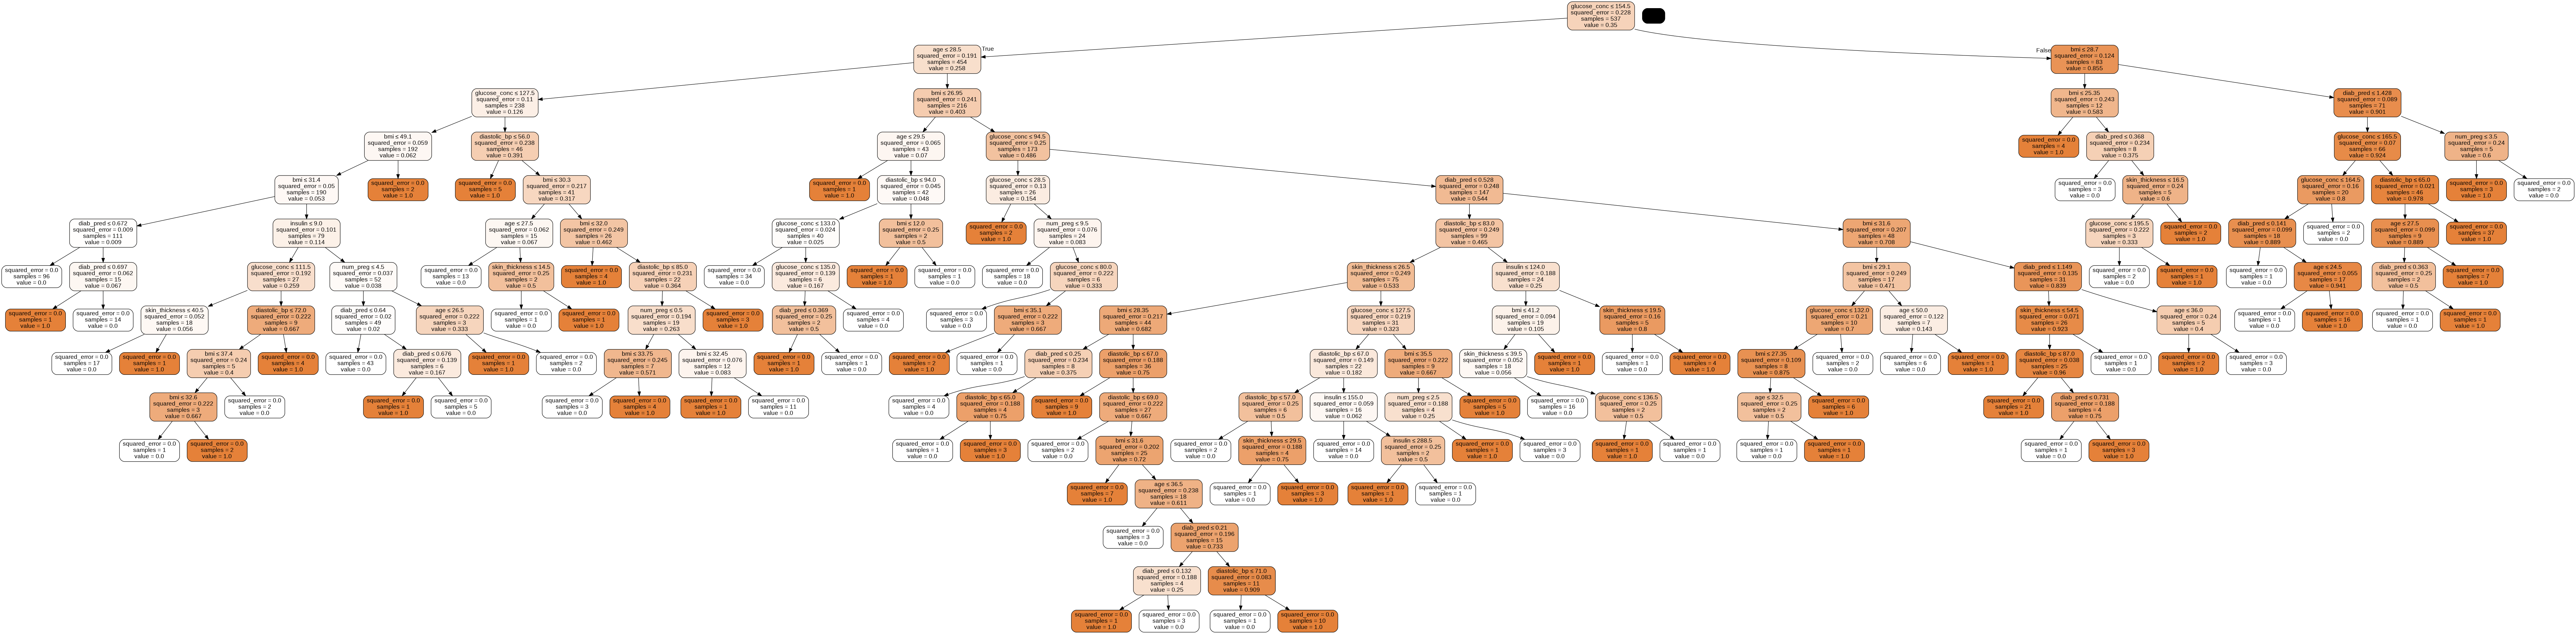

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix  
import graphviz 
from sklearn.tree import export_graphviz
import six
import sys
from six import StringIO
import pydotplus
from IPython.display import Image
string_to_int=preprocessing.LabelEncoder()
dot_data = StringIO()
sys.modules['sklearn.externals.six'] = six
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("Predicted grade: ",y_pred) 

print("\nAccuracy of the regression tree model is: ",metrics.accuracy_score(y_test, y_pred)*100,'%')

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

#printing the regression tree used in image format
print("The regression tree diagram for the given model and dataset is as follows:\n")
export_graphviz(regressor, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names=feature_col_names,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# **4. KNN**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix 

#defining the knn classification model using manhattan distance as the metric
knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan')

#fitting the training data in the model
knn.fit(X_train, y_train)

#prediciting the grades for the 11th course
y_pred = knn.predict(X_test)
#print the predicted grade
print("Predicted grade: \n", y_pred) 

#printing the accuracy of the model and the confusion matrix and classification report
print("\nAccuracy of the KNN Model is: ",metrics.accuracy_score(y_test, y_pred)*100,'%')


print("\nThe confusion matrix and the classification report of the model is as follows: \n")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

Predicted grade: 
 [0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 0]

Accuracy of the KNN Model is:  66.66666666666666 %

The confusion matrix and the classification report of the model is as follows: 

[[111  40]
 [ 37  43]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       151
           1       0.52      0.54      0.53        80

    accuracy                           0.67       231
   macro avg       0.63      0.64      0.64       231
weighted avg       0.67      0.67      0.67       231



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# **5. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# create Gaussian Naive Bayes model object and train it with the data
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train.ravel())

DecisionTreeClassifier(random_state=42)

In [ ]:
prediction_from_trained_data = dt_model.predict(X_train)

In [ ]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our DT model is : {0:.4f}".format(accuracy))

Accuracy of our DT model is : 1.0000


In [ ]:
dt_predict_test = dt_model.predict(X_test)

#get accuracy
dt_accuracy_testdata = metrics.accuracy_score(y_test, dt_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(dt_accuracy_testdata))

Accuracy: 0.7013


In [ ]:
import matplotlib as plot

print ("Confusion Matrix for DT")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, dt_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, dt_predict_test, labels=[ 1,0])))

Confusion Matrix for DT
[[ 55  25]
 [ 44 107]]

Classification Report

              precision    recall  f1-score   support

           1       0.56      0.69      0.61        80
           0       0.81      0.71      0.76       151

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.70      0.71       231

